<a href="https://colab.research.google.com/github/2212552/Projeto_IA_2023_2024/blob/Development_Carlos/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Image directories

In [ ]:
import os, shutil
train_dir = '/content/drive/MyDrive/AI/Projeto_AI/'
validation_dir = '/content/drive/MyDrive/AI/Projeto_AI/'
test_dir = '/content/drive/MyDrive/AI/Projeto_AI/'
#Caminhos de treino
train_airplane1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/000_airplane/'
train_airplane2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/000_airplane/'
train_airplane3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/000_airplane/'
train_airplane4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/000_airplane/'

train_automobile1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/001_automobile/'
train_automobile2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/001_automobile/'
train_automobile3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/001_automobile/'
train_automobile4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/001_automobile/'

train_bird1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/002_bird/'
train_bird2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/002_bird/'
train_bird3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/002_bird/'
train_bird4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/002_bird/'

train_cat1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/003_cat/'
train_cat2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/003_cat/'
train_cat3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/003_cat/'
train_cat4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/003_cat/'

train_deer1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/004_deer/'
train_deer2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/004_deer/'
train_deer3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/004_deer/'
train_deer4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/004_deer/'

train_dog1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/005_dog/'
train_dog2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/005_dog/'
train_dog3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/005_dog/'
train_dog4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/005_dog/'

train_frog1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/006_frog/'
train_frog2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/006_frog/'
train_frog3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/006_frog/'
train_frog4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/006_frog/'

train_horse1_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/007_horse/'
train_horse2_dir ='/content/drive/MyDrive/AI/Projeto_AI/train2/007_horse/'
train_horse3_dir ='/content/drive/MyDrive/AI/Projeto_AI/train3/007_horse/'
train_horse4_dir ='/content/drive/MyDrive/AI/Projeto_AI/train4/007_horse/'

train_ship1_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/008_ship/'
train_ship2_dir ='/content/drive/MyDrive/AI/Projeto_AI/train2/008_ship/'
train_ship3_dir ='/content/drive/MyDrive/AI/Projeto_AI/train3/008_ship/'
train_ship4_dir ='/content/drive/MyDrive/AI/Projeto_AI/train4/008_ship/'

train_truck1_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/009_truck/'
train_truck2_dir ='/content/drive/MyDrive/AI/Projeto_AI/train2/009_truck/'
train_truck3_dir ='/content/drive/MyDrive/AI/Projeto_AI/train3/009_truck/'
train_truck4_dir ='/content/drive/MyDrive/AI/Projeto_AI/train4/009_truck/'
#--------------------------------------------------------------------------------
#Caminho de Validações

val_airplane_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/000_airplane/'
val_automobile_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/001_automobile/'
val_bird_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/002_bird/'
val_cat_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/003_cat/'
val_deer_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/004_deer/'
val_dog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/005_dog/'
val_frog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/006_frog/'
val_horse_dir ='/content/drive/MyDrive/AI/Projeto_AI/train5/007_horse/'
val_ship_dir ='/content/drive/MyDrive/AI/Projeto_AI/train5/008_ship/'
val_truck_dir ='/content/drive/MyDrive/AI/Projeto_AI/train5/009_truck/'
#-------------------------------------------------------------------------------
#Caminho de testes


test_airplane_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/000_airplane/'
test_automobile_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/001_automobile/'
test_bird_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/002_bird/'
test_cat_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/003_cat/'
test_deer_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/004_deer/'
test_dog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/005_dog/'
test_frog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/006_frog/'
test_horse_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/007_horse/'
test_ship_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/008_ship/'
test_truck_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/009_truck/'
#-------------------------------------------------------------------------------------
#Numero de Treinos

print('total training airplanes images:', len(os.listdir(train_airplane1_dir)) + len(os.listdir(train_airplane2_dir)) + len(os.listdir(train_airplane3_dir)) + len(os.listdir(train_airplane4_dir)))
print('total training automobiles images:', len(os.listdir(train_automobile1_dir)) + len(os.listdir(train_automobile2_dir)) + len(os.listdir(train_automobile3_dir)) + len(os.listdir(train_automobile4_dir)))
print('total training birds images:', len(os.listdir(train_bird1_dir)) + len(os.listdir(train_bird2_dir)) + len(os.listdir(train_bird3_dir)) + len(os.listdir(train_bird4_dir)))
print('total training cats images:', len(os.listdir(train_cat1_dir)) + len(os.listdir(train_cat2_dir)) + len(os.listdir(train_cat3_dir)) + len(os.listdir(train_cat4_dir)))
print('total training deers images:', len(os.listdir(train_deer1_dir)) + len(os.listdir(train_deer2_dir)) + len(os.listdir(train_deer3_dir)) + len(os.listdir(train_deer4_dir)))
print('total training dogs images:', len(os.listdir(train_dog1_dir)) + len(os.listdir(train_dog2_dir)) + len(os.listdir(train_dog3_dir)) + len(os.listdir(train_dog4_dir)))
print('total training frogs images:', len(os.listdir(train_frog1_dir)) + len(os.listdir(train_frog2_dir)) + len(os.listdir(train_frog3_dir)) + len(os.listdir(train_frog4_dir)))
print('total training horses images:', len(os.listdir(train_horse1_dir)) + len(os.listdir(train_horse2_dir)) + len(os.listdir(train_horse3_dir)) + len(os.listdir(train_horse4_dir)))
print('total training ships images:', len(os.listdir(train_ship1_dir)) + len(os.listdir(train_ship2_dir)) + len(os.listdir(train_ship3_dir)) + len(os.listdir(train_ship4_dir)))
print('total training trucks images:', len(os.listdir(train_truck1_dir)) + len(os.listdir(train_truck2_dir)) + len(os.listdir(train_truck3_dir)) + len(os.listdir(train_truck4_dir)))


#---------------------------------------------------------------------------------
#Numero de validações

print('total validation airplanes images:', len(os.listdir(val_airplane_dir)))
print('total validation automobiles images:', len(os.listdir(val_automobile_dir)))
print('total validation birds images:', len(os.listdir(val_bird_dir)))
print('total validation cats images:', len(os.listdir(val_cat_dir)))
print('total validation deers images:', len(os.listdir(val_deer_dir)))
print('total validation dogs images:', len(os.listdir(val_dog_dir)))
print('total validation frogs images:', len(os.listdir(val_frog_dir)))
print('total validation horses images:', len(os.listdir(val_horse_dir)))
print('total validation ships images:', len(os.listdir(val_ship_dir)))
print('total validation trucks images:', len(os.listdir(val_truck_dir)))
#----------------------------------------------------------------------------------
#Numero de testes

print('total testing airplanes images:', len(os.listdir(test_airplane_dir)))
print('total testing automobiles images:', len(os.listdir(test_automobile_dir)))
print('total testing birds images:', len(os.listdir(test_bird_dir)))
print('total testing cats images:', len(os.listdir(test_cat_dir)))
print('total testing deers images:', len(os.listdir(test_deer_dir)))
print('total testing dogs images:', len(os.listdir(test_dog_dir)))
print('total testing frogs images:', len(os.listdir(test_frog_dir)))
print('total testing horses images:', len(os.listdir(test_horse_dir)))
print('total testing ships images:', len(os.listdir(test_ship_dir)))
print('total testing trucks images:', len(os.listdir(test_truck_dir)))



Pre Processamento data

In [73]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 128
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 60000 files belonging to 6 classes.
Found 60000 files belonging to 6 classes.
Found 60000 files belonging to 6 classes.


In [74]:
for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 128, 128, 3)
labels batch shape: (32,)


Mostra imagens

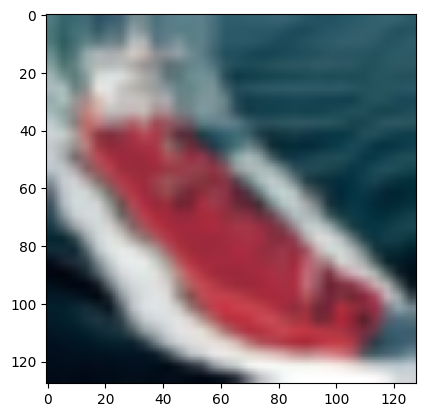

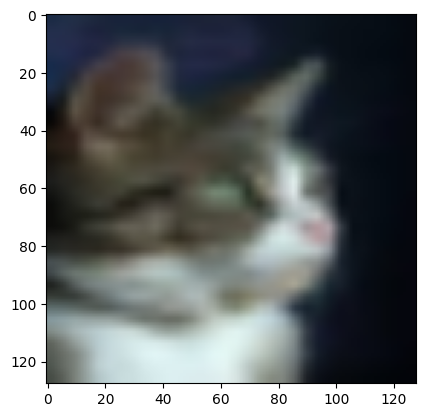

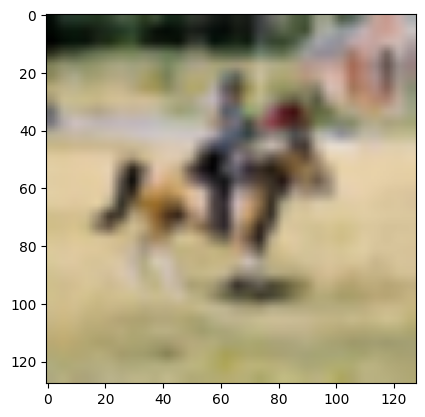

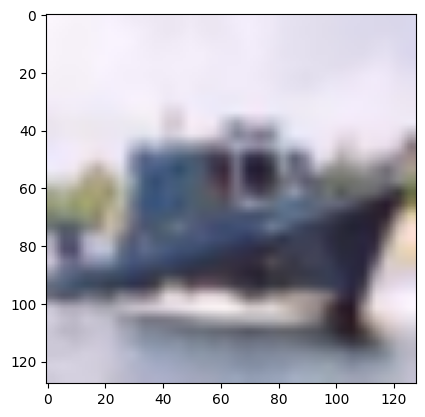

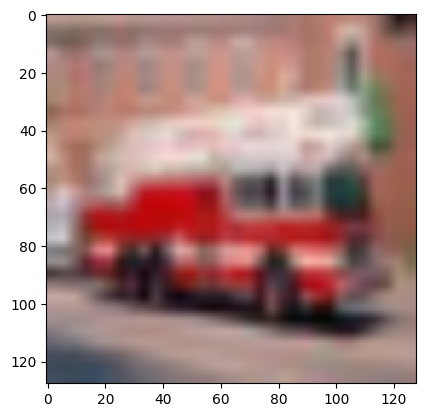

In [75]:
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

Cria o modelo neuronal

In [76]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Compila a rede neuronal

In [77]:
import tensorflow as tf
model.compile(
loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

Treina o modelo

In [78]:
history = model.fit(
train_dataset,
epochs=100,
validation_data=validation_dataset)

Epoch 1/100
  79/1875 [>.............................] - ETA: 2:13:31 - loss: -13316.0283 - acc: 0.1768

KeyboardInterrupt: 

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/AI/Projeto_AI.h5')
--------------------------
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

Mostra o grafico do progresso

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()